In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
df = pd.read_csv('Data/data.csv')
df_cmts = pd.read_csv('Data/comment.csv')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   post_id         412 non-null    int64 
 1   text            411 non-null    object
 2   time            412 non-null    object
 3   comments        412 non-null    int64 
 4   shares          412 non-null    int64 
 5   reaction_count  412 non-null    int64 
 6   like            412 non-null    int64 
 7   love            412 non-null    int64 
 8   care            412 non-null    int64 
 9   haha            412 non-null    int64 
 10  wow             412 non-null    int64 
 11  sad             412 non-null    int64 
 12  angry           412 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 42.0+ KB


### Bài đăng có lượng tương tác cao nhất

In [109]:
df['total_interactions'] = df['comments'] + df['shares'] + df['reaction_count']
max_interaction_post = df.loc[df['total_interactions'].idxmax()]
max_interaction_post

post_id                                                 779965290608074
text                  NOT IN MY HOUSE\nCUP IN MY HOUSE\n\nT1 là nhà ...
time                                                2023-11-19 18:11:14
comments                                                           1900
shares                                                             3600
reaction_count                                                    20832
like                                                              13179
love                                                               6225
care                                                                182
haha                                                               1225
wow                                                                  10
sad                                                                  10
angry                                                                 1
total_interactions                                              

In [110]:
print(max_interaction_post['text'])

NOT IN MY HOUSE
CUP IN MY HOUSE

T1 là nhà vô địch của CKTG 2023 và Summoner's Cup vẫn ở lại Hàn Quốc!!

#LCKVietNam #LCKWIN #WeMakeLegends #CKTG2023


### Bài đăng có lượng tương tác thấp nhất

In [111]:
min_interaction_post = df.loc[df['total_interactions'].idxmin()]
min_interaction_post

post_id                                                 763568722247731
text                  HiKR Ground - một địa điểm cho giới trẻ không ...
time                                                2023-10-18 12:00:01
comments                                                              1
shares                                                                0
reaction_count                                                       57
like                                                                 54
love                                                                  1
care                                                                  1
haha                                                                  1
wow                                                                   0
sad                                                                   0
angry                                                                 0
total_interactions                                              

In [112]:
print(min_interaction_post['text'])

HiKR Ground - một địa điểm cho giới trẻ không thể bỏ lỡ tại Seoul đã khoác lên mình bộ áo mới mang đậm phong cách CKTG "Worlds Playground". Tại đây, bạn có thể trải nghiệm Esports mà không ở đâu có được:
1️⃣ Lịch sử của các đội tuyển LCK tại CKTG.
2️⃣ Phòng trưng bày về xạ thủ Deft và Photoboth của CKTG 2023.
3️⃣ Hình ảnh 4 đội tuyển LCK tham gia CKTG 2023 và nơi check-in, viết lời cổ vũ.
4️⃣ Giới thiệu từng tuyển thủ / đội tuyển và văn hoá Hàn Quốc.

Chỉ với 22,9 triệu đồng, các bạn đã có thể trải nghiệm trọn vẹn tại HiKR Ground!! Hãy đăng ký ngay tour du lịch Esports rất đặc biệt được tổ chức bởi Tổng cục Du lịch Hàn Quốc tại Việt Nam, BOX Sports và SGO DMC nhé.

#KTOVietNam #BOXSports #SGODMC


### 10 bài viết có lượng tương tác cao nhất 

In [113]:
top_posts = df.sort_values(by='total_interactions', ascending=False).head(10)
top_posts_info = top_posts[['post_id', 'total_interactions', 'text']]
top_posts_info

,post_id,total_interactions,text
88,779965290608074,26332,NOT IN MY HOUSE\nCUP IN MY HOUSE\n\nT1 là nhà ...
118,777172490887354,19317,Faker và Ruler chiếm trọn khoảnh khắc của tuần...
44,782332423704694,17355,BLV Hoàng Luân chơi lớn ngay sau khi T1 tái ký...
24,783858630218740,16597,Game Moba ❌\nGame đua xe bắn súng ✅
247,770063194931617,16208,Mừng ngày vui của chú rể Văn Tùng và cô dâu Qu...
18,784399593497977,15722,Quỷ Vương Faker kẻ hủy diệt LPL
130,776349904302946,14803,[BÁN KẾT CKTG 2023: T1 3-1 JDG]\n\nJDG rất tốt...
172,773812617890008,14395,Top 1 sẽ không làm anh em thất vọng
86,779975337273736,14263,4 CUP VÔ ĐỊCH THẾ GIỚI TRONG 10 NĂM SỰ NGHIỆP\...
83,780049397266330,13810,Xem đến cuối để coi fan hâm mộ T1 ở Việt Nam đ...


In [114]:
for index, post in top_posts.iterrows():
    print(post['text'])
    print("\n" + "-"*50 + "\n")

NOT IN MY HOUSE
CUP IN MY HOUSE

T1 là nhà vô địch của CKTG 2023 và Summoner's Cup vẫn ở lại Hàn Quốc!!

#LCKVietNam #LCKWIN #WeMakeLegends #CKTG2023

--------------------------------------------------

Faker và Ruler chiếm trọn khoảnh khắc của tuần thi đấu vừa qua.

--------------------------------------------------

BLV Hoàng Luân chơi lớn ngay sau khi T1 tái ký hợp đồng với đội hình vô địch CKTG 2023.

#LCK #LCKVietNam #WeMakeLegends

--------------------------------------------------

Game Moba ❌
Game đua xe bắn súng ✅

--------------------------------------------------

Mừng ngày vui của chú rể Văn Tùng và cô dâu Quỳnh Mai. Chúc hai bạn trăm năm hạnh phúc ❤❤

--------------------------------------------------

Quỷ Vương Faker kẻ hủy diệt LPL

--------------------------------------------------

[BÁN KẾT CKTG 2023: T1 3-1 JDG]

JDG rất tốt nhưng T1 rất tiếc. Sẽ không có cú Grand Slam nào ở mùa giải 2023 cả mà chỉ có một T1 vô cùng mạnh mẽ và tràn đầy khí thể. Cup vẫn còn nguyên tại 

In [115]:
vietnamese_stop_words = ["và", "là", "của", "có", "một", "trong", "được", "các", "toàn", "đã", "thành", "như", "để", "làm", 
                         "cho", "với", "cũng", "vào", "trên", "nhưng", "đến", "này", "ở", "nếu", "những", "về", "qua", "nói",
                         "ngày", "nếu", "chỉ", "bị", "thì", "từ", "đó", "và", "còn", "này", "rất", "nên", "đều", "làm", "muốn",
                         "đấu", "tại", "đội", "thể", "sĩ", "thụy", "kết", "sẽ", "không", "thức", "ván", "trận","cùng","khi",
                         "vòng", "thắng", "vs", "vô", "đầu", "tứ", "tuyển", "cái", "lịch", "du", "bởi"]

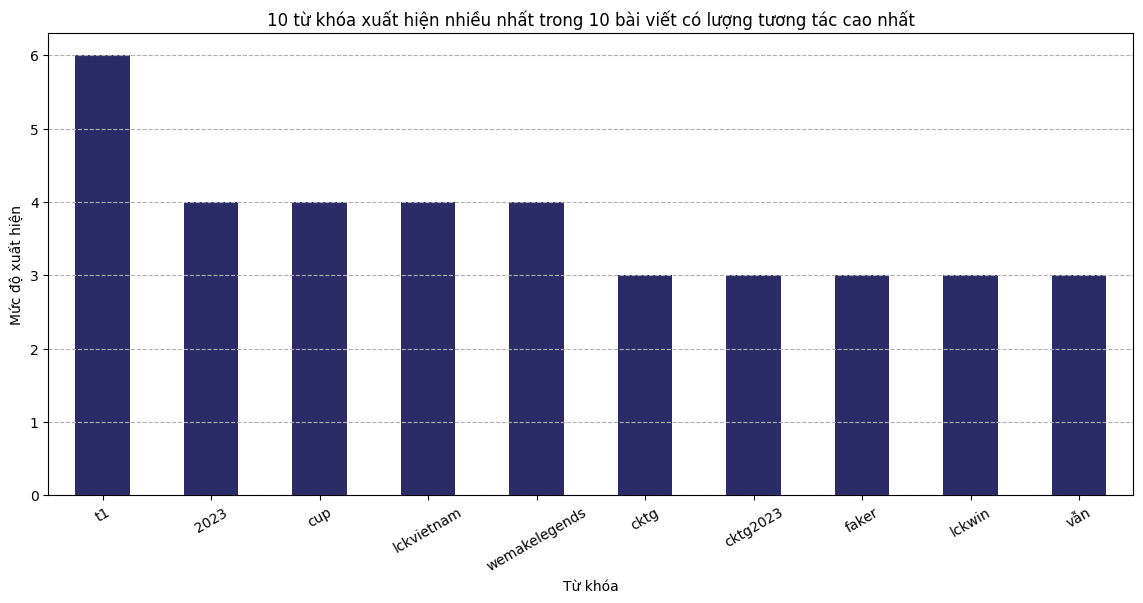

In [116]:
top_posts_text = top_posts['text']
vectorizer = CountVectorizer(stop_words=vietnamese_stop_words)
X = vectorizer.fit_transform(top_posts_text)
df_word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = df_word_counts.sum()

plt.figure(figsize=(14, 6))
word_counts.nlargest(10).plot(kind='bar', color='#2B2C67')
plt.title('10 từ khóa xuất hiện nhiều nhất trong 10 bài viết có lượng tương tác cao nhất')
plt.xlabel('Từ khóa')
plt.ylabel('Mức độ xuất hiện')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--')
plt.show()

In [117]:
bottom_posts = df.sort_values(by='total_interactions', ascending=True).head(10)
bottom_posts_info = bottom_posts[['post_id', 'total_interactions', 'text']]
bottom_posts_info

,post_id,total_interactions,text
402,763568722247731,58,HiKR Ground - một địa điểm cho giới trẻ không ...
253,769522198319050,92,Full highlights: G2 1 - 2 BLG | Vòng Thụy Sĩ C...
279,768956835042253,99,Highlights: NRG 2 - 0 G2 | Vòng Thụy Sĩ CKTG 2023
233,771548154783121,99,NA last hope và cái kết đắng dành cho NRG trướ...
201,772474684690468,116,Tóm tắt đại chiến JDG vs KT trong 10 phút | Ru...
164,774780817793188,118,"Những pha xử lý đỉnh cao, combat cực căng đến ..."
261,769448224993114,124,Full highlights: WBG 2 - 1 FNC | Vòng Thụy Sĩ ...
75,780455690559034,128,Trong khi người hâm mộ đang phát cuồng với chứ...
408,763052918965978,144,BẠN CÓ HẸN VỚI BRION ESPORTS VÀO THÁNG 11 TẠI ...
302,767949818476288,144,[THỂ THỨC THỤY SĨ (1-2) - CKTG 2023: C9 1-1 FN...


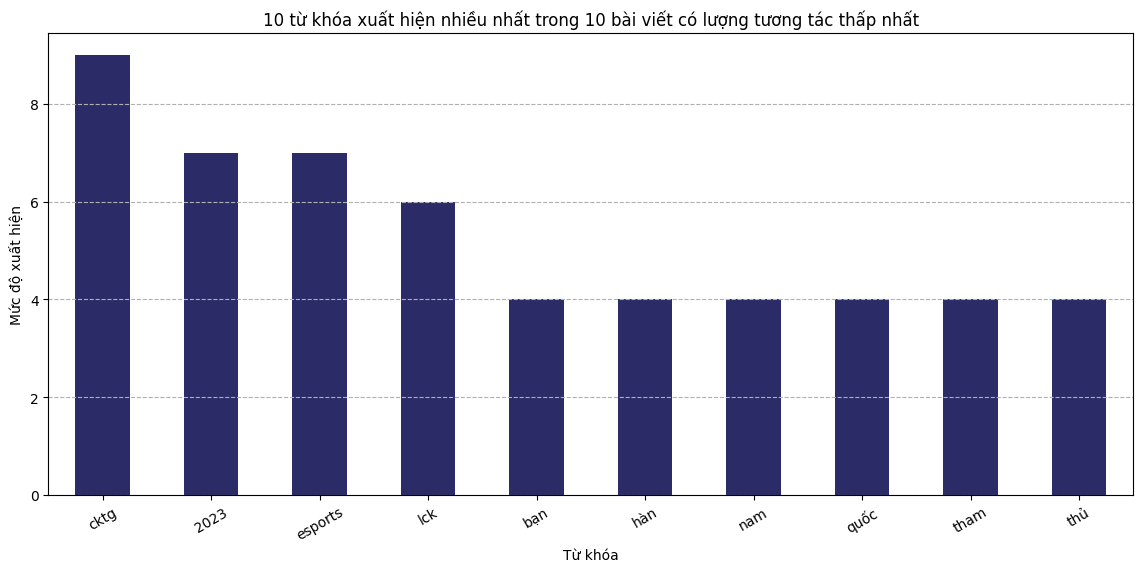

In [118]:
bottom_posts_text = bottom_posts['text']
vectorizer = CountVectorizer(stop_words=vietnamese_stop_words)
X = vectorizer.fit_transform(bottom_posts_text)
df_word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = df_word_counts.sum()

plt.figure(figsize=(14, 6))
word_counts.nlargest(10).plot(kind='bar', color='#2B2C67')
plt.title('10 từ khóa xuất hiện nhiều nhất trong 10 bài viết có lượng tương tác thấp nhất')
plt.xlabel('Từ khóa')
plt.ylabel('Mức độ xuất hiện')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--')
plt.show()

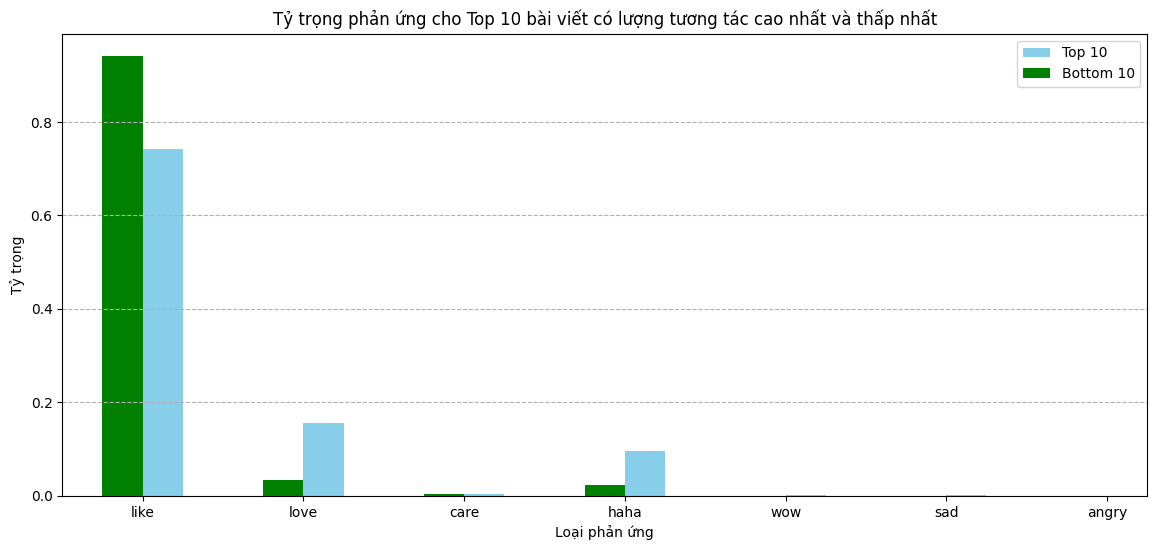

In [119]:
top_posts_reaction_ratios = top_posts[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']].div(top_posts['reaction_count'], axis=0)
bottom_posts_reaction_ratios = bottom_posts[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']].div(bottom_posts['reaction_count'], axis=0)

avg_top_reaction_ratios = top_posts_reaction_ratios.mean()
avg_bottom_reaction_ratios = bottom_posts_reaction_ratios.mean()

fig, ax = plt.subplots(figsize=(14, 6))
avg_top_reaction_ratios.plot(kind='bar', ax=ax, position=0, width=0.25, color='skyblue', label='Top 10')
avg_bottom_reaction_ratios.plot(kind='bar', ax=ax, position=1, width=0.25, color='green', label='Bottom 10')
ax.set_title('Tỷ trọng phản ứng cho Top 10 bài viết có lượng tương tác cao nhất và thấp nhất')
ax.set_xlabel('Loại phản ứng')
ax.set_ylabel('Tỷ trọng')
ax.legend()
plt.xticks(rotation=0)
ax.grid(axis='y', linestyle='--')
plt.show()

### Tỷ trọng giữa các loại phản ứng của mọi người

In [120]:
reaction_counts = df[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']].sum()
df_percent = pd.DataFrame(reaction_counts / reaction_counts.sum() * 100, columns=['Percentage'])
df_percent.sort_values(by='Percentage', ascending=False)

,Percentage
like,81.151617
love,9.125299
haha,8.714864
sad,0.388713
care,0.319169
wow,0.286849
angry,0.013488


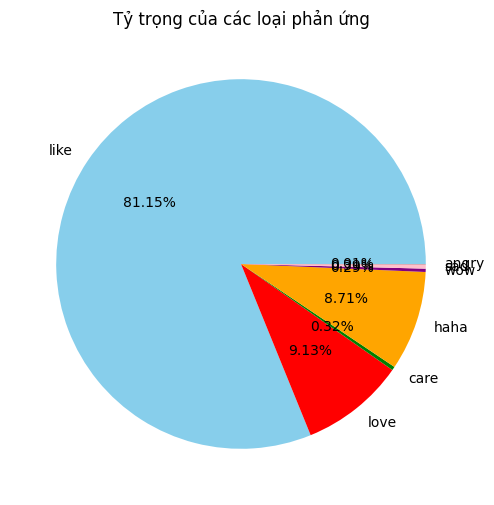

In [121]:
plt.figure(figsize=(6, 6))
plt.pie(reaction_counts, labels=reaction_counts.index, autopct='%1.2f%%', colors=['skyblue', 'red', 'green', 'orange', 'purple', 'pink', 'black'])
plt.title('Tỷ trọng của các loại phản ứng')
plt.show()

### Bài đăng được 'yêu thích' nhất

In [122]:
max_love_post = df.loc[df['love'].idxmax()]
max_love_post

post_id                                                 779965290608074
text                  NOT IN MY HOUSE\nCUP IN MY HOUSE\n\nT1 là nhà ...
time                                                2023-11-19 18:11:14
comments                                                           1900
shares                                                             3600
reaction_count                                                    20832
like                                                              13179
love                                                               6225
care                                                                182
haha                                                               1225
wow                                                                  10
sad                                                                  10
angry                                                                 1
total_interactions                                              

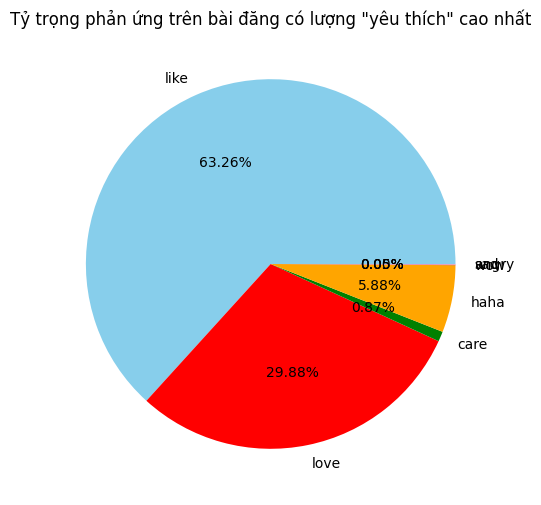

In [123]:
reaction_ratios = max_love_post[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']] / max_love_post['reaction_count'] * 100

plt.figure(figsize=(6, 6))
plt.pie(reaction_ratios.values, labels=reaction_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'red', 'green', 'orange', 'purple', 'pink', 'red'])
plt.title('Tỷ trọng phản ứng trên bài đăng có lượng "yêu thích" cao nhất')
plt.show()

### Bài đăng bị 'phẫn nộ' nhất

In [124]:
max_angry_post = df.loc[df['angry'].idxmax()]
max_angry_post

post_id                                                 764732555464681
text                  [THỂ THỨC THỤY SĨ (0-1) - CKTG 2023: FNC 1-0 G...
time                                                2023-10-20 15:59:32
comments                                                            450
shares                                                                5
reaction_count                                                     1089
like                                                                766
love                                                                  4
care                                                                  1
haha                                                                221
wow                                                                   2
sad                                                                  29
angry                                                                66
total_interactions                                              

In [125]:
max_angry_post_text=df.loc[df['angry'].idxmax(),'text']
print(max_angry_post_text)

[THỂ THỨC THỤY SĨ (0-1) - CKTG 2023: FNC 1-0 GAM]

GAM đã có khởi đầu rất tốt khi Kiaya thi đấu xuất sắc ở đường trên, tuy nhiên sự phối hợp rời rạc đã khiên GAM mất đi cơ hội lăn cầu tuyết. Khi điểm mạnh nhất là giao tranh thua xa đối thủ, GAM đành ngậm ngùi nhạn thất bại chỉ sau 24 phút.

#LCKVietNam #LCKWIN #WeMakeLegends #CKTG2023


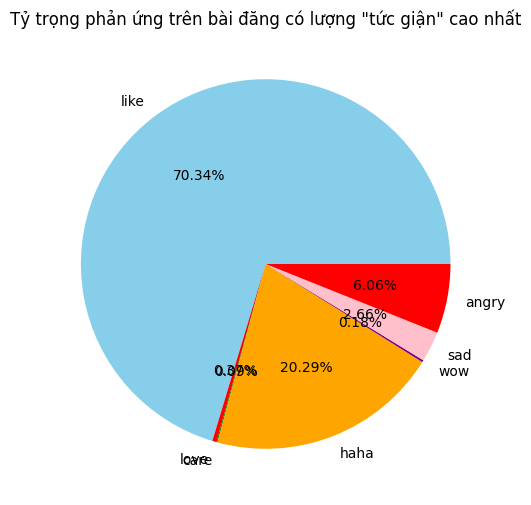

In [126]:
reaction_ratios = max_angry_post[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']] / max_angry_post['reaction_count'] * 100

plt.figure(figsize=(6, 6))
plt.pie(reaction_ratios.values, labels=reaction_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'red', 'green', 'orange', 'purple', 'pink', 'red'])
plt.title('Tỷ trọng phản ứng trên bài đăng có lượng "tức giận" cao nhất')
plt.show()

### Bài đăng được chia sẻ nhiều nhất

In [127]:
max_share_post = df.loc[df['shares'].idxmax()]
max_share_post

post_id                                                 779965290608074
text                  NOT IN MY HOUSE\nCUP IN MY HOUSE\n\nT1 là nhà ...
time                                                2023-11-19 18:11:14
comments                                                           1900
shares                                                             3600
reaction_count                                                    20832
like                                                              13179
love                                                               6225
care                                                                182
haha                                                               1225
wow                                                                  10
sad                                                                  10
angry                                                                 1
total_interactions                                              

In [128]:
max_shared_post_text = df.loc[df['shares'].idxmax(), 'text']
print(max_shared_post_text)

NOT IN MY HOUSE
CUP IN MY HOUSE

T1 là nhà vô địch của CKTG 2023 và Summoner's Cup vẫn ở lại Hàn Quốc!!

#LCKVietNam #LCKWIN #WeMakeLegends #CKTG2023


### Bài đăng nhiều bình luận nhất

In [129]:
max_comment_post = df.loc[df['comments'].idxmax()]
max_comment_post

post_id                                                 772003591404244
text                  [TỨ KẾT CKTG 2023: GEN 2-3 BLG]\n\nĐương kim v...
time                                                2023-11-03 19:30:58
comments                                                           3100
shares                                                              199
reaction_count                                                     6821
like                                                               4623
love                                                                 89
care                                                                 18
haha                                                               1769
wow                                                                  19
sad                                                                 300
angry                                                                 3
total_interactions                                              

In [130]:
max_comment_post_text = df.loc[df['comments'].idxmax(), 'text']
print(max_comment_post_text)

[TỨ KẾT CKTG 2023: GEN 2-3 BLG]

Đương kim vô địch LCK gục ngã tại Tứ Kết CKTG trước seed 2 của LPL - BLG.

#LCKVietNam #LCKWIN #WeMakeLegends #CKTG2023


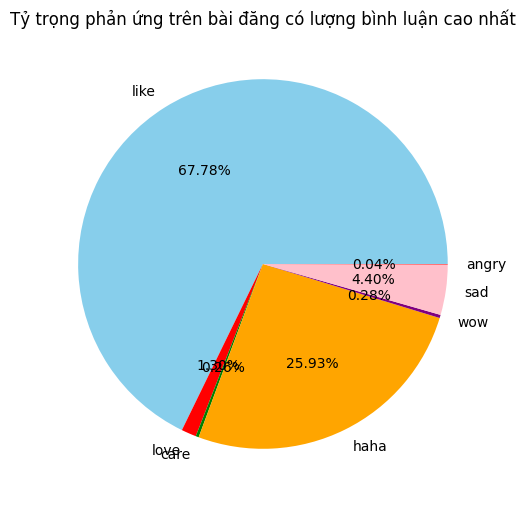

In [131]:
reaction_ratios = max_comment_post[['like', 'love', 'care', 'haha', 'wow', 'sad', 'angry']] / max_comment_post['reaction_count'] * 100

plt.figure(figsize=(6, 6))
plt.pie(reaction_ratios.values, labels=reaction_ratios.index, autopct='%1.2f%%', colors=['skyblue', 'red', 'green', 'orange', 'purple', 'pink', 'red'])
plt.title('Tỷ trọng phản ứng trên bài đăng có lượng bình luận cao nhất')
plt.show()

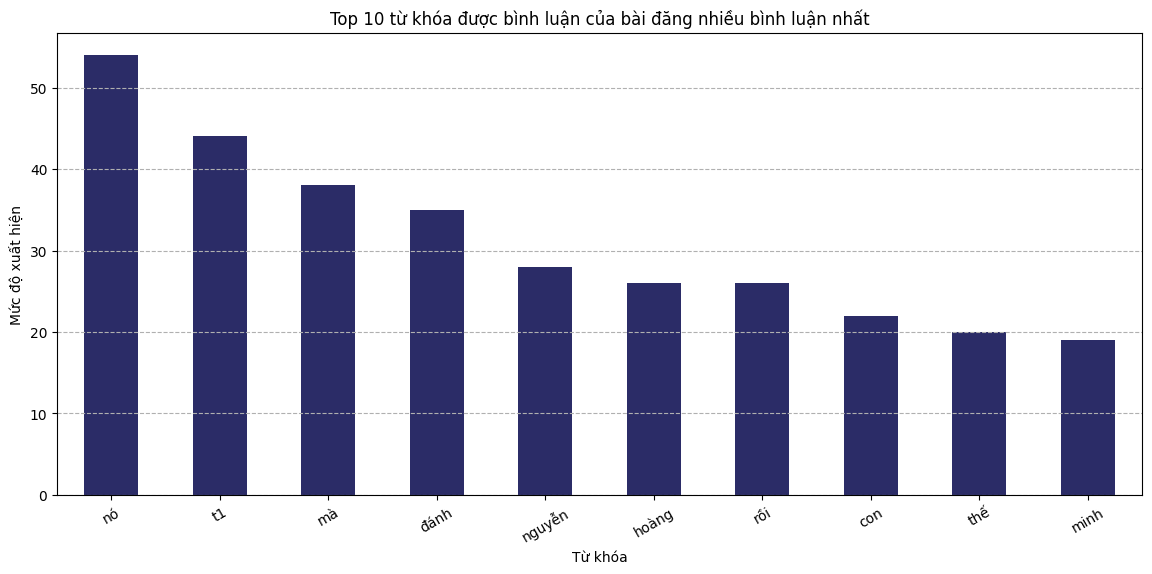

In [132]:
comments_for_max_post = df_cmts[df_cmts['post_id'] == max_comment_post['post_id']].copy()
comments_for_max_post['comment_text'] = comments_for_max_post['comment_text'].fillna('')
vectorizer_ = CountVectorizer(stop_words=vietnamese_stop_words)
X_ = vectorizer_.fit_transform(comments_for_max_post['comment_text'])
df_word_counts_ = pd.DataFrame(X_.toarray(), columns=vectorizer_.get_feature_names_out())
word_counts_ = df_word_counts_.sum()

plt.figure(figsize=(14,6))
word_counts_.nlargest(10).plot(kind='bar', color= '#2B2C67')
plt.title('Top 10 từ khóa được bình luận của bài đăng nhiều bình luận nhất')
plt.xlabel('Từ khóa')
plt.ylabel('Mức độ xuất hiện')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--')
plt.show()

### Tần suất đăng bài theo giờ

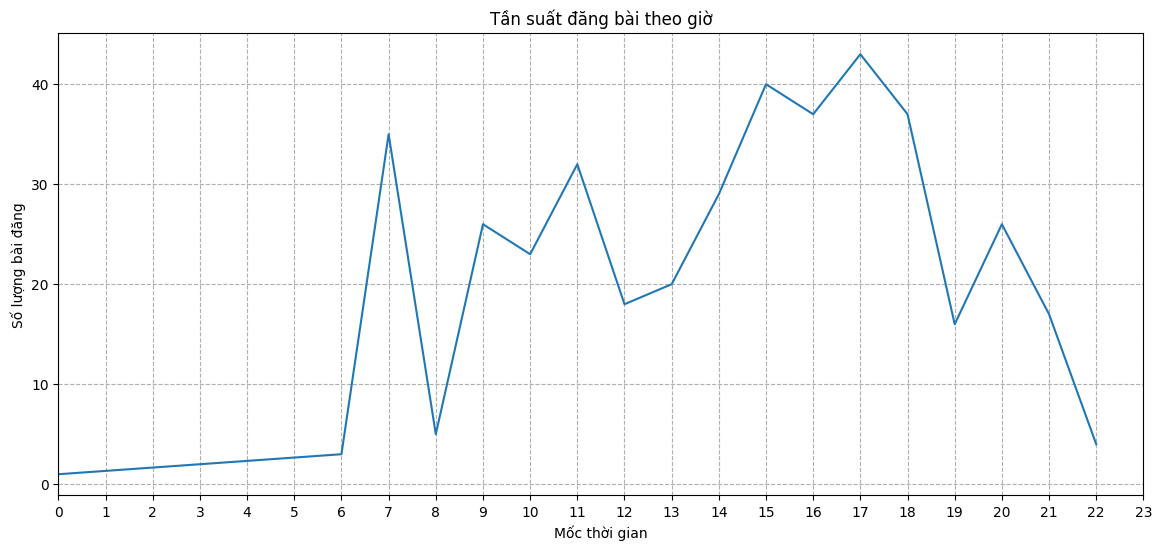

In [133]:
df['time'] = pd.to_datetime(df['time'])
hourly_counts = df['time'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(14, 6))
plt.plot(hourly_counts.index, hourly_counts.values)
plt.title('Tần suất đăng bài theo giờ')
plt.xlabel('Mốc thời gian')
plt.ylabel('Số lượng bài đăng')
plt.xticks(range(24))
plt.grid(linestyle="--")
plt.xlim(0, 23)
plt.show()

### Tần suất đăng bài theo ngày

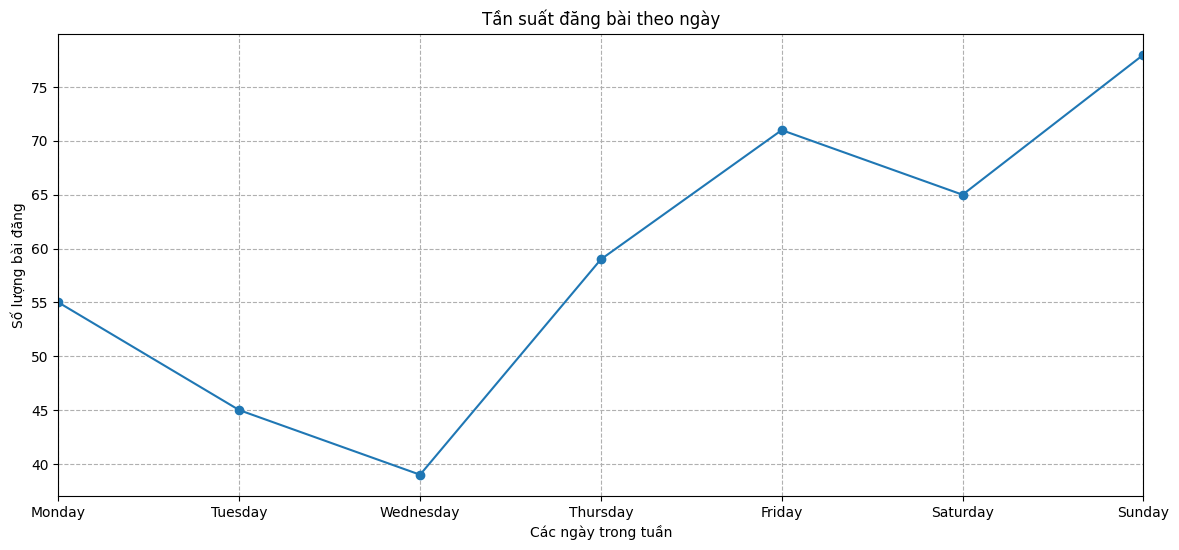

In [134]:
daily_counts = df['time'].dt.day_name().value_counts().sort_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = daily_counts.loc[day_order]

plt.figure(figsize=(14, 6))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('Tần suất đăng bài theo ngày')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Số lượng bài đăng')
plt.xticks(range(7))
plt.grid(linestyle="--")
plt.xlim(0, 6)
plt.show()

### Lượt tương tác các ngày trong tuần

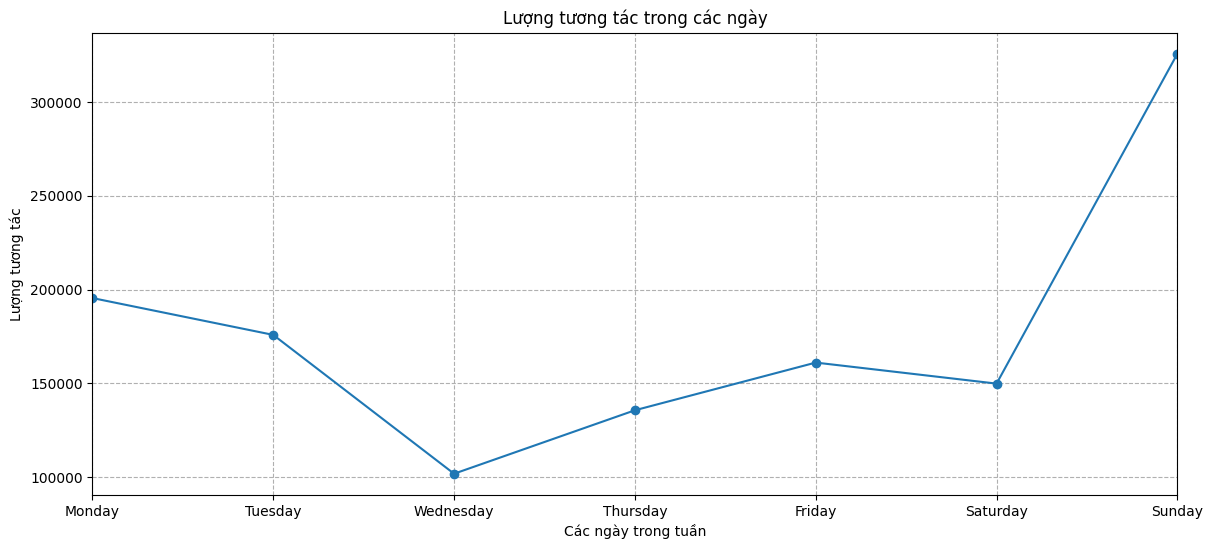

In [135]:
df['date'] = df['time'].dt.day_name()
daily_interactions = df.groupby('date')['total_interactions'].sum().reindex(day_order)

plt.figure(figsize=(14, 6))
plt.plot(daily_interactions.index, daily_interactions.values, marker='o')
plt.title('Lượng tương tác trong các ngày')
plt.xlabel('Các ngày trong tuần')
plt.ylabel('Lượng tương tác')
plt.grid(linestyle="--")
plt.xlim(0, 6)
plt.show()

### Sự tương quan giữa độ dài nội dung bài đăng và các sự tương tác

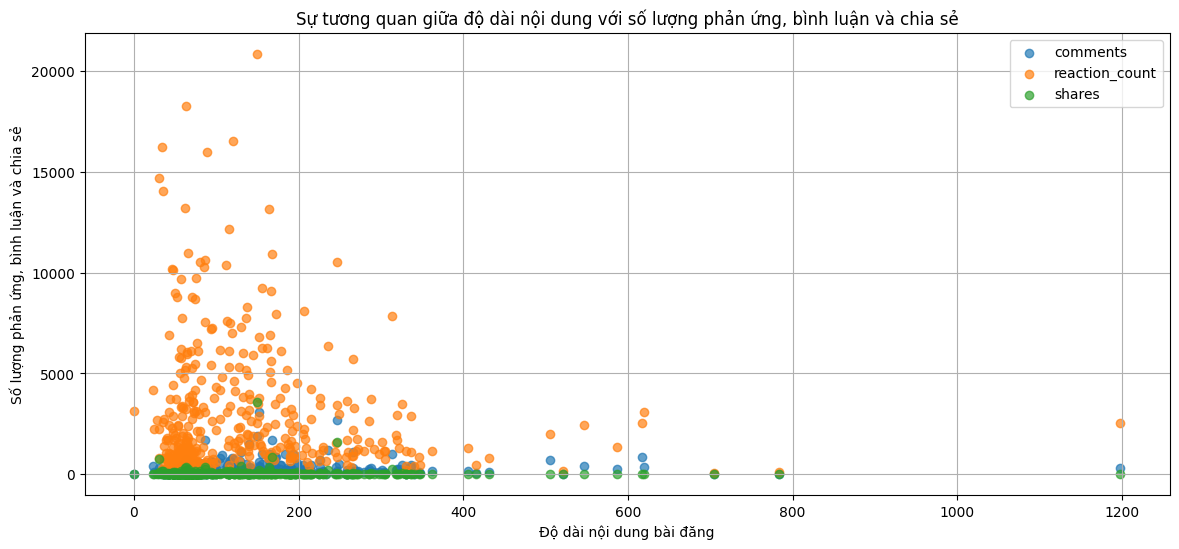

In [136]:
df['text'] = df['text'].fillna('')
df['text_length'] = df['text'].apply(len)
fields_to_compare = ['comments', 'reaction_count','shares']

plt.figure(figsize=(14, 6))

for field in fields_to_compare:
    plt.scatter(df['text_length'], df[field], label=field, alpha=0.69)

plt.title('Sự tương quan giữa độ dài nội dung với số lượng phản ứng, bình luận và chia sẻ')
plt.xlabel('Độ dài nội dung bài đăng')
plt.ylabel('Số lượng phản ứng, bình luận và chia sẻ')
plt.legend()
plt.grid(True)
plt.show()

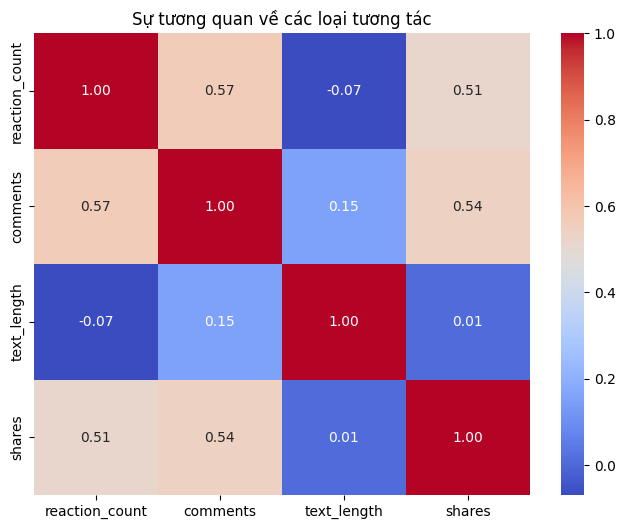

In [137]:
df['text'] = df['text'].fillna('')
df['text_length'] = df['text'].apply(len)
fields_to_compare = ['reaction_count', 'comments', 'text_length', 'shares']
correlation_matrix = df[fields_to_compare].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sự tương quan về các loại tương tác')
plt.show()

### Top những từ xuất hiện nhiều nhất trong nội dung bài đăng

In [138]:
vietnamese_stop_words = ["và", "là", "của", "có", "một", "trong", "được", "các", "toàn", "đã", "thành", "như", "để", "làm", 
                         "cho", "với", "cũng", "vào", "trên", "nhưng", "đến", "này", "ở", "nếu", "những", "về", "qua", "nói",
                         "ngày", "nếu", "chỉ", "bị", "thì", "từ", "đó", "và", "còn", "này", "rất", "nên", "đều", "làm", "muốn",
                         "đấu", "tại", "đội", "thể", "sĩ", "thụy", "kết", "sẽ", "không", "thức", "ván", "trận","cùng","khi",
                         "vòng", "thắng", "vs", "vô", "đầu", "tứ", "tuyển", "cái"]

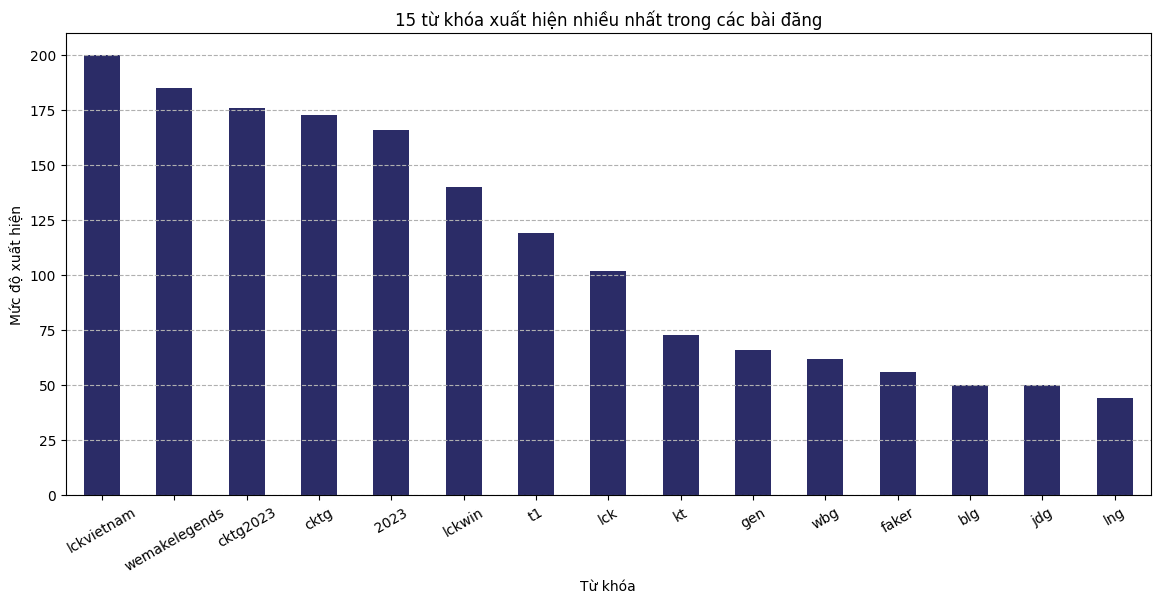

In [139]:
df['text'] = df['text'].fillna('')
vectorizer = CountVectorizer(stop_words=vietnamese_stop_words)
X = vectorizer.fit_transform(df['text'])
df_word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = df_word_counts.sum()

plt.figure(figsize=(14,6))
word_counts.nlargest(15).plot(kind='bar', color= '#2B2C67')
plt.title('15 từ khóa xuất hiện nhiều nhất trong các bài đăng')
plt.xlabel('Từ khóa')
plt.ylabel('Mức độ xuất hiện')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--')
plt.show()

### Top những từ xuất hiện nhiều nhất trong phần bình luận

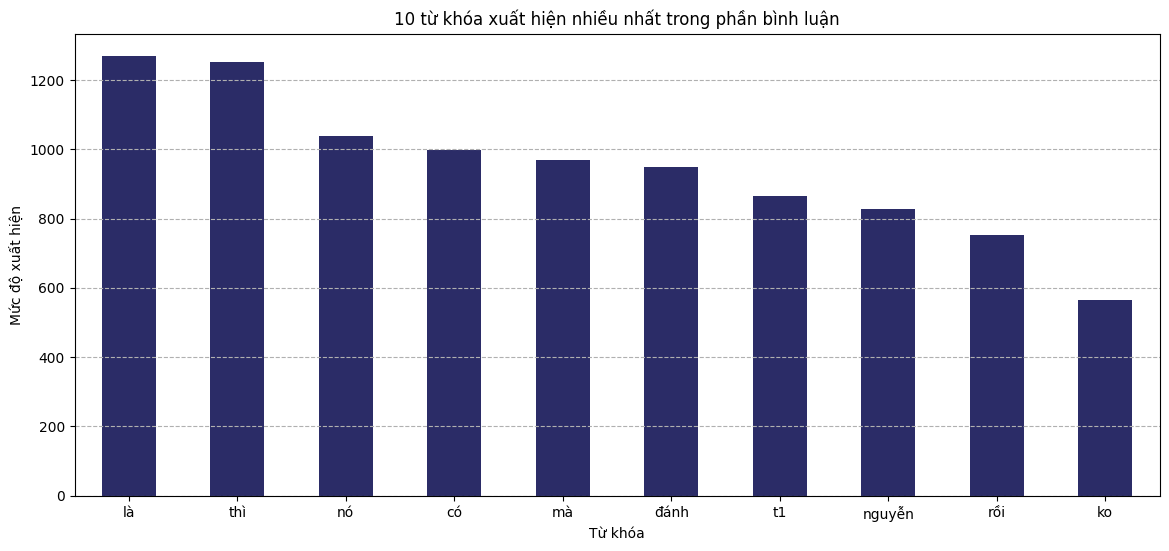

In [142]:
df_cmts['comment_text'] = df_cmts['comment_text'].fillna('')
vectorizer_ = CountVectorizer(stop_words='english')
X_ = vectorizer_.fit_transform(df_cmts['comment_text'])
df_word_counts_ = pd.DataFrame(X_.toarray(), columns=vectorizer_.get_feature_names_out())
word_counts_ = df_word_counts_.sum()

plt.figure(figsize=(14,6))
word_counts_.nlargest(10).plot(kind='bar', color= '#2B2C67')
plt.title('10 từ khóa xuất hiện nhiều nhất trong phần bình luận')
plt.xlabel('Từ khóa')
plt.ylabel('Mức độ xuất hiện')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

### Phân phối số lượng bình luận trong các bài đăng

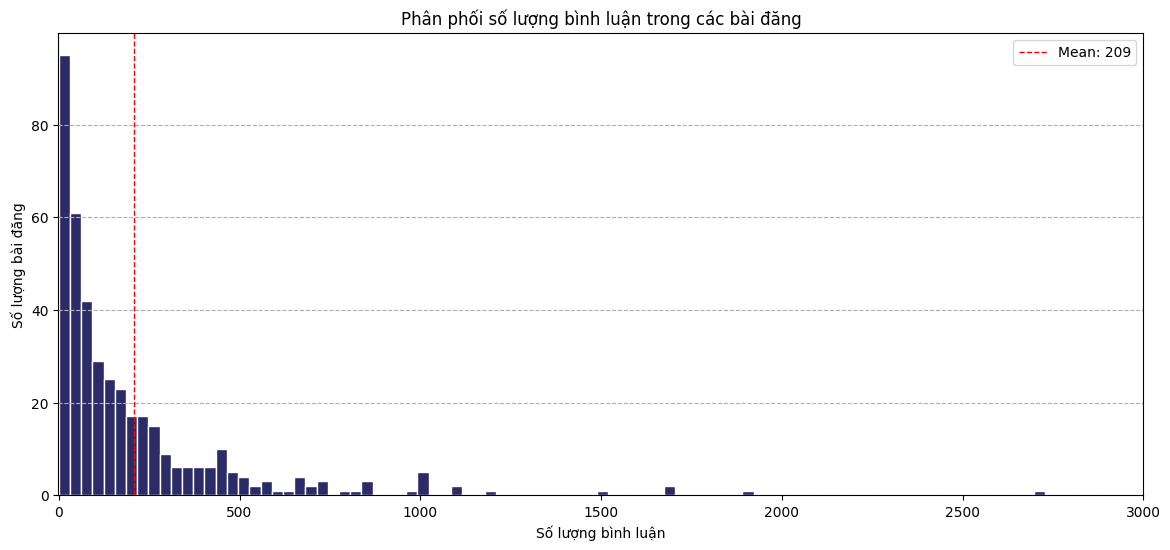

In [143]:
average_comments_per_post = df['comments'].mean()
plt.figure(figsize=(14, 6))
plt.hist(df['comments'], bins=100, color='#2B2C67', edgecolor='white')
plt.axvline(average_comments_per_post, color='red', linestyle='--', linewidth=1, label=f'Mean: {average_comments_per_post:.0f}')
plt.title('Phân phối số lượng bình luận trong các bài đăng')
plt.xlabel('Số lượng bình luận')
plt.ylabel('Số lượng bài đăng')
plt.grid(axis='y', linestyle='--')
plt.xlim(-1, 3000)
plt.legend()
plt.show()

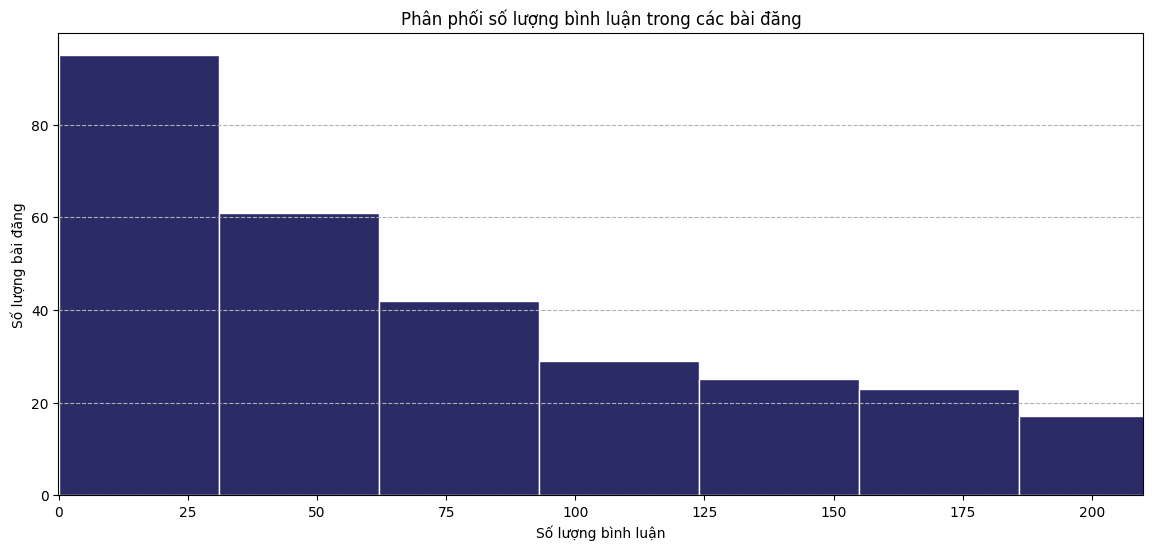

In [144]:
plt.figure(figsize=(14, 6))
plt.hist(df['comments'], bins=100, color='#2B2C67', edgecolor='white')
plt.title('Phân phối số lượng bình luận trong các bài đăng')
plt.xlabel('Số lượng bình luận')
plt.ylabel('Số lượng bài đăng')
plt.grid(axis='y', linestyle='--')
plt.xlim(-0.1, 210)
plt.show()